In [33]:
#Import relevant python libraries
import requests, json, time, datetime, warnings, re, os
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import xarray as xr
import pandas as pd


In [48]:
#Point to directory containing downloaded netcdf files from the Southern Ocean array
pathname = 'C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/'
list_files = os.listdir(pathname)
#filename = 'deployment0002_GS03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20151217T194501-20161206T093001.nc'

In [61]:
#Remove any files that aren't netcdf - defensive coding
for i in list_files:
    if i.endswith('.nc') == False:
        list_files.remove(i)
filenames = [os.path.join(pathname, i) for i in list_files]

In [135]:
#Find all files that match a given platform
platform = 'FLMB'

platform_sel = []
for i in filenames:
    if platform in i:
        platform_sel.append(i)

In [136]:
#Find all files from that platform that match a given sensor type
sensor = 'DOSTA'

sensor_sel = []
for i in platform_sel:
    if sensor in i:
        sensor_sel.append(i)
        
sensor_sel

['C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/deployment0001_GS03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150223T203001-20151026T123001.nc',
 'C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/deployment0002_GS03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20151216T194501-20160611T010001.nc',
 'C:/Users/Hilary/Dropbox/OceanHackWeek/southern-ocean-ooi-downloads/deployment0003_GS03FLMB-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20161203T191501-20170331T231501.nc']

In [137]:
#Define a function for opening each data file

def open_data(file):
    ds = xr.open_dataset(file)
    ds = ds.swap_dims({'obs': 'time'})
    ds = ds.sortby('time')
    return ds

In [138]:
#Open each file in the list using the function defined above

all_ds = [open_data(file) for file in sensor_sel]

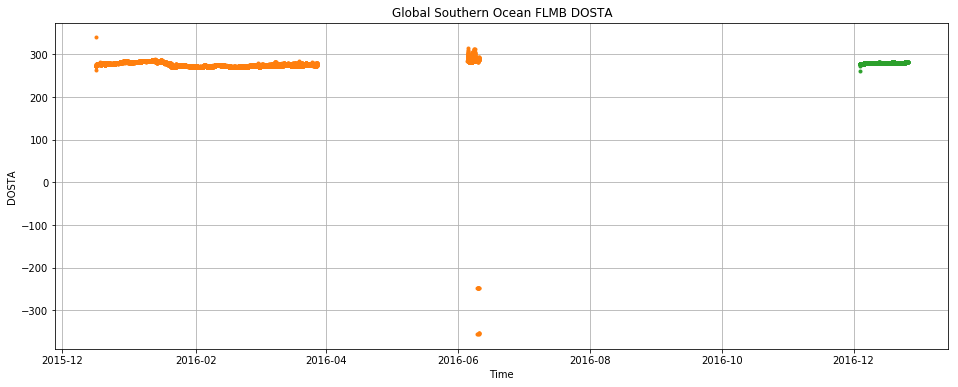

In [139]:
#Plot data from all datasets

fig, ax = plt.subplots(1)
fig.set_size_inches(16, 6)

for i,value in enumerate(all_ds):
    ax.plot(all_ds[i]['time'], all_ds[i]['dissolved_oxygen'], marker='.', linewidth=0)
ax.grid()

plt.title('Global Southern Ocean ' + platform + ' ' + sensor)
plt.ylabel(sensor)
plt.xlabel('Time')
plt.show()